In [1]:
# Importing the required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [2]:
# Reading the csv file and putting it into 'df' object.
df = pd.read_csv('heart_v2.csv')

In [3]:
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [4]:
# Putting feature variable to X
X = df.drop('heart disease',axis=1)

# Putting response variable to y
y = df['heart disease']


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((189, 4), (81, 4))

Fitting the decision tree with default hyperparameters, apart from max_depth which is 3 so that we can plot and read the tree.

In [6]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

Text(0.5, 1.0, 'Decision Tree Visualization (Random Forest)')

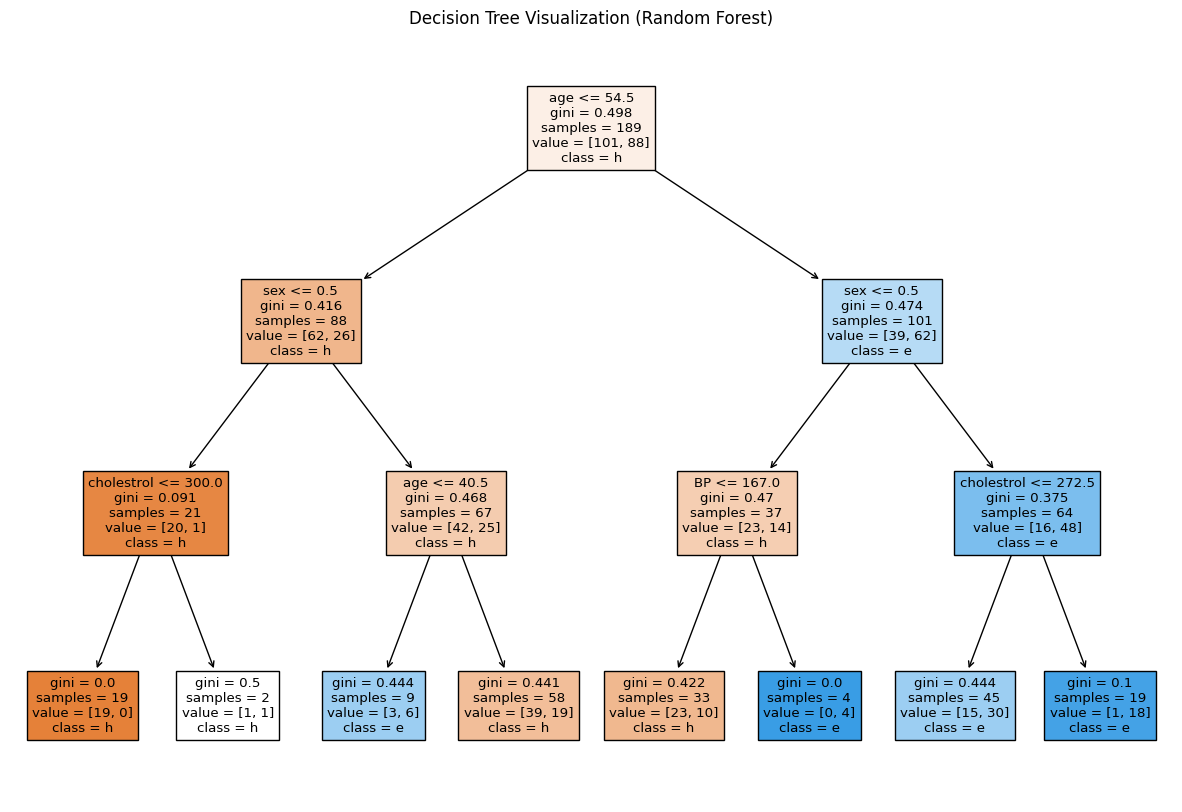

In [7]:
plt.figure(figsize=(15, 10))
plot_tree(dt, feature_names=X.columns.to_list(), class_names=df.columns[-1], filled=True)
plt.title("Decision Tree Visualization (Random Forest)")


#### Evaluating model performance

In [8]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [9]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.7407407407407407


array([[82, 19],
       [30, 58]], dtype=int64)

In [10]:
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.6049382716049383


array([[35, 14],
       [18, 14]], dtype=int64)

### Using Random Forest

In [18]:
### Initilaize the model
rf=RandomForestClassifier(random_state=42,n_estimators=100 ,oob_score=True,max_depth=3)

### fit the model
rf.fit(X_train, y_train)
rf.estimators_[:4]

[DecisionTreeClassifier(max_depth=3, max_features='auto',
                        random_state=1608637542),
 DecisionTreeClassifier(max_depth=3, max_features='auto',
                        random_state=1273642419),
 DecisionTreeClassifier(max_depth=3, max_features='auto',
                        random_state=1935803228),
 DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=787846414)]

In random forest, we have to plot the 

Text(0.5, 1.0, 'Decision Tree Visualization (Random Forest)')

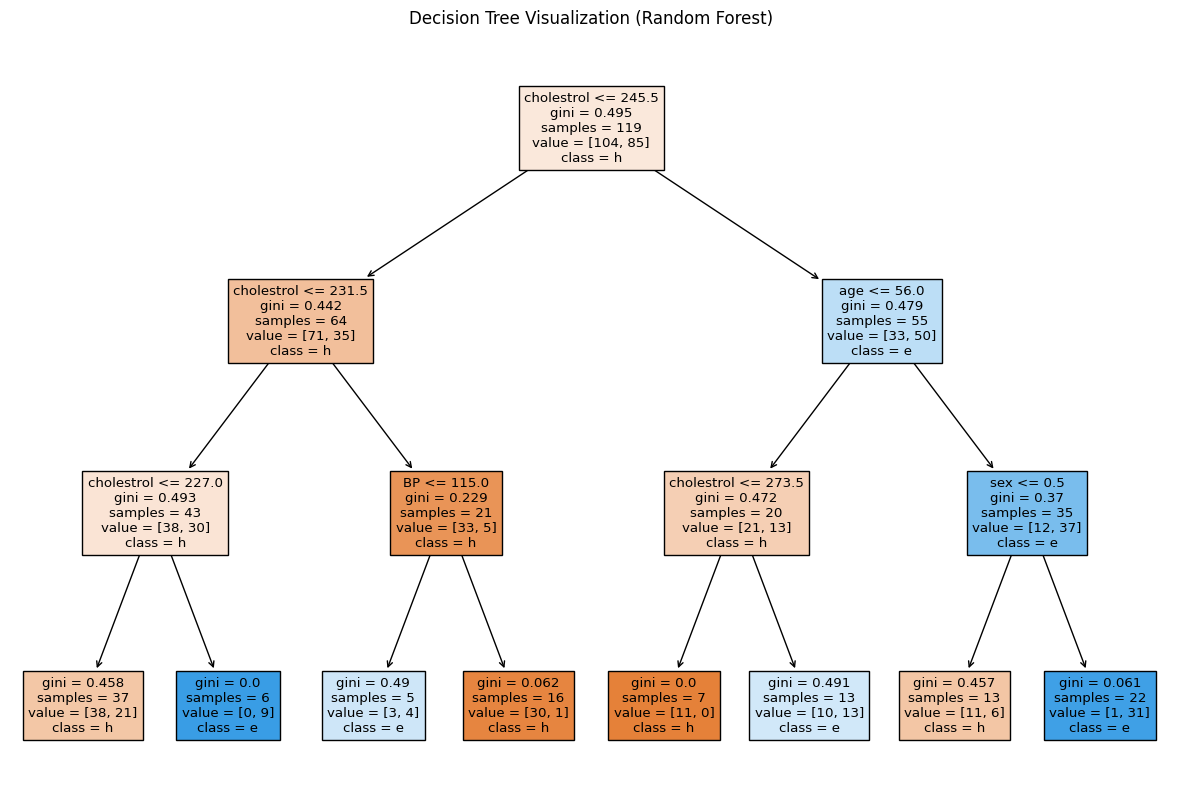

In [19]:
plt.figure(figsize=(15, 10))
plot_tree(rf.estimators_[98], feature_names=X.columns.to_list(), class_names=df.columns[-1], filled=True)
plt.title("Decision Tree Visualization (Random Forest)")


In [31]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

print(accuracy_score(y_train, y_train_pred))
print(confusion_matrix(y_train, y_train_pred))

print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.746031746031746
[[82 19]
 [29 59]]
0.654320987654321


array([[37, 12],
       [16, 16]], dtype=int64)

### Grid search for hyper-parameter tuning 

In [25]:
params = {
    'max_depth':[1,2,4,10,20],
    'min_samples_leaf':[5,10,20,50,100],
    'max_features':[2,3,4],
    'n_estimators':[10,30,50,100,200]
}


In [26]:
grid_search= GridSearchCV(estimator=rf,param_grid=params,cv=4,verbose=1,scoring='accuracy')

In [27]:
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 375 candidates, totalling 1125 fits


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_depth=3, oob_score=True,
                                              random_state=42),
             param_grid={'max_depth': [1, 2, 4, 10, 20],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [38]:
rf_best=RandomForestClassifier(max_depth= 2, max_features= 2, min_samples_leaf= 5, n_estimators= 10)
grid_search.best_params_

{'max_depth': 2, 'max_features': 2, 'min_samples_leaf': 5, 'n_estimators': 10}

In [40]:
rf_best.fit(X_train,y_train)

y_train_pred = rf_best.predict(X_train)
y_test_pred = rf_best.predict(X_test)

print(accuracy_score(y_train, y_train_pred))
print(confusion_matrix(y_train, y_train_pred))

print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.7301587301587301
[[76 25]
 [26 62]]
0.691358024691358


array([[37, 12],
       [13, 19]], dtype=int64)

### Feature Importance

In [44]:
imp_df=pd.DataFrame({
    'Variable': X_train.columns,
    'Imp':rf_best.feature_importances_
})
imp_df

,Variable,Imp
0,age,0.358644
1,sex,0.241809
2,BP,0.204908
3,cholestrol,0.194638
